**Autor:** Andrej Gajdoš  <br> 
_[Ústav matematických vied](https://www.upjs.sk/prirodovedecka-fakulta/ustav/umv/), [Prírodovedecká fakulta](https://www.upjs.sk/prirodovedecka-fakulta/), Univerzita Pavla Jozefa Šafárika v Košiciach,_ <br> 
email: [andrej.gajdos@upjs.sk](mailto:andrej.gajdos@upjs.sk)
*** 

**_Tento materiál vznikol za podpory grantu VVGS-2022-2412._**

***

**<font size=6 color=gold> Introduction to Pandas</font>**  

<a id=table_of_contents></a>
###  Table of Contents 


* [What is Pandas?](#pandas) - a brief description of Pandas


* [Data structures](#data_structures) - fundamental data structures in *pandas* 


* [Basic functionality](#basic_functionality) - simple methods concerning Series and DataFrames including indexing and data selecting


* [Grouping and merging](#grouping_merging) - useful manipulations with DataFrames


* [Descriptive statistics](#descriptive_stats) - illustration of descriptive statistics with *pandas*


* [Visualization](#visualization) - basic plotting


* [Working with external files](#files) - example of reading (input) and writting (output) data


* [References](#references)


**To get back to the contents, use <font color=brown>the Home key</font>.**

***
<a id=pandas></a>
# <font color=brown> What is Pandas?</font>

**Pandas** is a Python package providing fast, flexible, and expressive data structures designed to make working with "relational" or "labeled" data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language. It is already well on its way toward this goal. 
The name "pandas" is derived from the term "panel data", an econometrics term for data sets that include observations over multiple time periods for the same individuals.

Here are just a few of the things that *pandas* does well:

- easy handling of missing data (represented as NaN) in floating point as well as non-floating point data;

- size mutability: columns can be inserted and deleted from DataFrame and higher dimensional objects;

- automatic and explicit data alignment: objects can be explicitly aligned to a set of labels, or the user can simply ignore the labels and let Series, DataFrame, etc. automatically align the data for you in computations;

- powerful, flexible group by functionality to perform split-apply-combine operations on data sets, for both aggregating and transforming data;

- make it easy to convert ragged, differently-indexed data in other Python and NumPy data structures into DataFrame objects;

- intelligent label-based slicing, fancy indexing, and subsetting of large data sets;

- intuitive merging and joining data sets;

- flexible reshaping and pivoting of data sets;

- hierarchical labeling of axes (possible to have multiple labels per tick);

- robust IO tools for loading data from flat files (CSV and delimited), Excel files, databases, and saving / loading data from the ultrafast HDF5 format;

- time series-specific functionality: date range generation and frequency conversion, moving window statistics, date shifting and lagging. 

For data scientists, working with data is typically divided into multiple stages: munging and cleaning data, analyzing / modeling it, then organizing the results of the analysis into a form suitable for plotting or tabular display. pandas is the ideal tool for all of these tasks. 

Some other notes: 

- _pandas_ is **fast**; many of the low-level algorithmic bits have been extensively tweaked in Cython code; however, as with anything else generalization usually sacrifices performance; so if you focus on one feature for your application you may be able to create a faster specialized tool; 

- *pandas* is a dependency of *[statsmodels](https://www.statsmodels.org/stable/index.html)*, making it an important part of the statistical computing ecosystem in Python; 

- *pandas* has been used extensively in production in financial applications.

**Pandas** is built on top of the **NumPy** package, meaning a lot of the structure of NumPy is used or replicated in Pandas. Data in pandas is often used to feed statistical analysis in **SciPy**, plotting functions from **Matplotlib**, and machine learning algorithms in **Scikit-learn**. 

***
<a id=data_structures></a>
# <font color=brown> Data structures</font>

In [1]:
import numpy as np 
import pandas as pd

Pandas deals with the following three data structures: Series, DataFrame, Panel. 

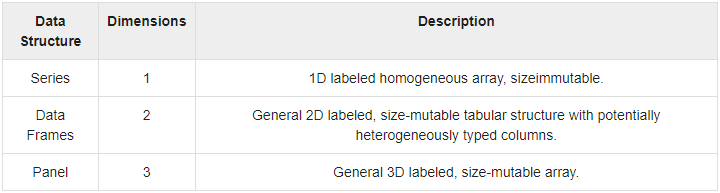

[source](https://www.tutorialspoint.com/python_pandas/python_pandas_introduction_to_data_structures.htm)

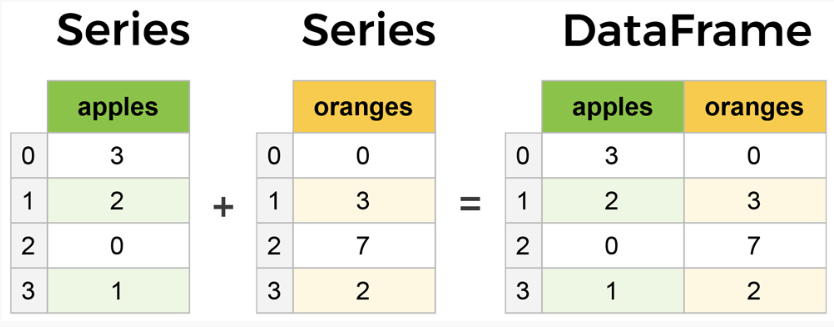 

[source](https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/)

The best way to think of these data structures is that the higher dimensional data structure is a container of its lower dimensional data structure. For example, DataFrame is a container of Series, Panel is a container of DataFrame. 

All Pandas data structures are value mutable (can be changed) and except Series all are size mutable. Series is size immutable.

### Series

**Creating Series from ndarray.**

In [9]:
data = np.array(['a','b','c','d']) 
s = pd.Series(data)
s

0    a
1    b
2    c
3    d
dtype: object

In [10]:
print(s)

0    a
1    b
2    c
3    d
dtype: object


We did not pass any index, so by default, it assigned the indexes ranging from 0 to `len(data)-1`, i.e., 0 to 3.

In [11]:
data = np.array(['a','b','c','d'])
s = pd.Series(data,index=[100,101,102,103]) 
s

100    a
101    b
102    c
103    d
dtype: object

**Creating Series from dict.** 

In [12]:
data = {'a' : 0., 'b' : 1., 'c' : 2.}
s = pd.Series(data)
s

a    0.0
b    1.0
c    2.0
dtype: float64

Observe that Dictionary keys are used to construct indices.

In [13]:
data = {'a' : 0., 'b' : 1., 'c' : 2.}
s = pd.Series(data,index=['b','c','d','a'])
s

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

Index order is persisted and the missing element is filled with `NaN` (Not a Number).

**Creating Series from scalar.** 

If data is a scalar value, an index must be provided. The value will be repeated to match the length of index. 

In [14]:
s = pd.Series(5, index=[0, 1, 2, 3])
s

0    5
1    5
2    5
3    5
dtype: int64

**Accessing Data from Series with position.** 

Data in the series can be accessed similar to that in an ndarray. 

In [15]:
s = pd.Series([1,2,3,4,5],index = ['a','b','c','d','e'])
s[0],s[3]

(1, 4)

Retrieve the first three elements in the Series. 

In [16]:
s[:3]

a    1
b    2
c    3
dtype: int64

Similarly we have 

In [17]:
s[0:2]

a    1
b    2
dtype: int64

In [18]:
s[1:]

b    2
c    3
d    4
e    5
dtype: int64

Retrieve the last three elements.

In [20]:
print(s[-3:])

c    3
d    4
e    5
dtype: int64


Retrieve Data Using Label (Index). A Series is like a fixed-size dict in that you can get and set values by index label. 

In [22]:
print(s['a'])

1


In [23]:
print(s[['a','c','d']])

a    1
c    3
d    4
dtype: int64


### DataFrame

A Data frame is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns. You can think of it as an SQL table or a spreadsheet data representation. 

A pandas DataFrame can be created using various inputs like − Lists, dict, Series, Numpy ndarrays, another DataFrame. 

In [25]:
# empty DataFrame
df = pd.DataFrame()
print(df)

Empty DataFrame
Columns: []
Index: []


**Creating DataFrame from Lists.** 

The DataFrame can be created using a single list or a list of lists. 

In [26]:
data = [1,2,3,4,5]
df = pd.DataFrame(data)
print(df)

   0
0  1
1  2
2  3
3  4
4  5


In [27]:
data = [['Alex',10],['Bob',12],['Clarke',13]]
df = pd.DataFrame(data,columns=['Name','Age'])
print(df)

     Name  Age
0    Alex   10
1     Bob   12
2  Clarke   13


**Creating DataFrame from Dict of ndarrays / Lists.** 

All the ndarrays must be of same length. If index is passed, then the length of the index should equal to the length of the arrays. If no index is passed, then by default, index will be `range(n)`, where `n` is the array length.

In [28]:
data = {'Name':['Tom', 'Jack', 'Steve', 'Ricky'],'Age':[28,34,29,42]}
df = pd.DataFrame(data)
print(df)

    Name  Age
0    Tom   28
1   Jack   34
2  Steve   29
3  Ricky   42


In [29]:
data = {'Name':['Tom', 'Jack', 'Steve', 'Ricky'],'Age':[28,34,29,42]}
df = pd.DataFrame(data, index=['rank1','rank2','rank3','rank4'])
print(df)

        Name  Age
rank1    Tom   28
rank2   Jack   34
rank3  Steve   29
rank4  Ricky   42


**Creating DataFrame from Dict of ndarrays / Lists.** 

All the ndarrays must be of same length. If index is passed, then the length of the index should equal to the length of the arrays. If no index is passed, then by default, index will be `range(n)`, where `n` is the array length.

In [30]:
data = {'Name':['Tom', 'Jack', 'Steve', 'Ricky'],'Age':[28,34,29,42]}
df = pd.DataFrame(data)
print(df)

    Name  Age
0    Tom   28
1   Jack   34
2  Steve   29
3  Ricky   42


In [31]:
data = {'Name':['Tom', 'Jack', 'Steve', 'Ricky'],'Age':[28,34,29,42]}
df = pd.DataFrame(data, index=['rank1','rank2','rank3','rank4'])
print(df)

        Name  Age
rank1    Tom   28
rank2   Jack   34
rank3  Steve   29
rank4  Ricky   42


**Creating a DataFrame from List of Dicts.** 

List of Dictionaries can be passed as input data to create a DataFrame. The dictionary keys are by default taken as column names. 

In [32]:
data = [{'a': 1, 'b': 2},{'a': 5, 'b': 10, 'c': 20}]
df = pd.DataFrame(data)
print(df)

   a   b     c
0  1   2   NaN
1  5  10  20.0


Notice that `NaN` (Not a Number) is appended in missing areas. 

In [33]:
data = [{'a': 1, 'b': 2},{'a': 5, 'b': 10, 'c': 20}]
df = pd.DataFrame(data, index=['first', 'second'])
print(df)

        a   b     c
first   1   2   NaN
second  5  10  20.0


The following example shows how to create a DataFrame with a list of dictionaries, row indices, and column indices. 

In [34]:
 data = [{'a': 1, 'b': 2},{'a': 5, 'b': 10, 'c': 20}]

#With two column indices, values same as dictionary keys
df1 = pd.DataFrame(data, index=['first', 'second'], columns=['a', 'b'])
print(df1)

        a   b
first   1   2
second  5  10


In [35]:
#With two column indices with one index with other name
df2 = pd.DataFrame(data, index=['first', 'second'], columns=['a', 'b1'])
print(df2)

        a  b1
first   1 NaN
second  5 NaN


Observe, `df2` DataFrame is created with a column index other than the dictionary key; thus, appended the NaN's in place. Whereas, `df1` is created with column indices same as dictionary keys, so NaN's appended.

**Creating a DataFrame from Dict of Series.**

In [36]:
d = {'one' : pd.Series([1, 2, 3], index=['a', 'b', 'c']),
   'two' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}

df = pd.DataFrame(d)
print(df)

   one  two
a  1.0    1
b  2.0    2
c  3.0    3
d  NaN    4


**Column Selection.** 

In [38]:
d = {'one' : pd.Series([1, 2, 3], index=['a', 'b', 'c']),
   'two' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}

df = pd.DataFrame(d)
print(df['one'])

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64


**Column Addition.**

In [40]:
d = {'one' : pd.Series([1, 2, 3], index=['a', 'b', 'c']),
   'two' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)

# Adding a new column to an existing DataFrame object with column label by passing new series
print ("Adding a new column by passing as Series:")
df['three']=pd.Series([10,20,30],index=['a','b','c'])
print(df)

Adding a new column by passing as Series:
   one  two  three
a  1.0    1   10.0
b  2.0    2   20.0
c  3.0    3   30.0
d  NaN    4    NaN


In [41]:
print ("Adding a new column using the existing columns in DataFrame:")
df['four']=df['one']+df['three']
print(df)

Adding a new column using the existing columns in DataFrame:
   one  two  three  four
a  1.0    1   10.0  11.0
b  2.0    2   20.0  22.0
c  3.0    3   30.0  33.0
d  NaN    4    NaN   NaN


**Column Deletion.** 

Columns can be deleted or popped; let us take an example to understand how.

In [42]:
# Using the previous DataFrame, we will delete a column
# using del function
import pandas as pd

d = {'one' : pd.Series([1, 2, 3], index=['a', 'b', 'c']), 
   'two' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd']), 
   'three' : pd.Series([10,20,30], index=['a','b','c'])}

df = pd.DataFrame(d)
print("Our dataframe is:")
print(df)

Our dataframe is:
   one  two  three
a  1.0    1   10.0
b  2.0    2   20.0
c  3.0    3   30.0
d  NaN    4    NaN


In [43]:
# using del function
print ("Deleting the first column using DEL function:")
del df['one']
print(df)

Deleting the first column using DEL function:
   two  three
a    1   10.0
b    2   20.0
c    3   30.0
d    4    NaN


In [44]:
# using pop function
print ("Deleting another column using POP function:")
df.pop('two')
print(df)

Deleting another column using POP function:
   three
a   10.0
b   20.0
c   30.0
d    NaN


**Row Selection, Addition, and Deletion.**

Rows can be selected by passing row label to a `loc` function. 

In [45]:
d = {'one' : pd.Series([1, 2, 3], index=['a', 'b', 'c']), 
   'two' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)
print(df.loc['b'])

one    2.0
two    2.0
Name: b, dtype: float64


The result is a series with labels as column names of the DataFrame. And, the Name of the series is the label with which it is retrieved.

Rows can be selected by passing integer location to an `iloc` function.

In [46]:
df = pd.DataFrame(d)
print(df.iloc[2])

one    3.0
two    3.0
Name: c, dtype: float64


Multiple rows can be selected using `:` operator. 

In [49]:
df = pd.DataFrame(d)
print(df[2:4])

   one  two
c  3.0    3
d  NaN    4


Add new rows to a DataFrame using the `append` function. This function will append the rows at the end. 

In [50]:
df = pd.DataFrame([[1, 2], [3, 4]], columns = ['a','b'])
df2 = pd.DataFrame([[5, 6], [7, 8]], columns = ['a','b'])
df = df.append(df2)
print (df)

   a  b
0  1  2
1  3  4
0  5  6
1  7  8


Use index label to delete or drop rows from a DataFrame. If label is duplicated, then multiple rows will be dropped.

If you observe, in the above example, the labels are duplicate. Let us drop a label and will see how many rows will get dropped.

In [51]:
# Drop rows with label 0
df = df.drop(0)
print(df)

   a  b
1  3  4
1  7  8


### Panel

A panel is a 3D container of data. The term Panel data is derived from econometrics and is partially responsible for the name pandas − pan(el)-da(ta)-s.

The names for the 3 axes are intended to give some semantic meaning to describing operations involving panel data: 

- items − axis 0, each item corresponds to a DataFrame contained inside; 

- major_axis − axis 1, it is the index (rows) of each of the DataFrames; 

- minor_axis − axis 2, it is the columns of each of the DataFrames.

**Creating Panel.** 

A Panel can be created using multiple ways - from ndarrays, from dict of DataFrames. 

In [52]:
# creating an empty Panel from 3D ndarray
data = np.random.rand(2,4,5)
p = pd.Panel(data)
print(p)

<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 4 (major_axis) x 5 (minor_axis)
Items axis: 0 to 1
Major_axis axis: 0 to 3
Minor_axis axis: 0 to 4


C:\Users\Andrej\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  exec(code_obj, self.user_global_ns, self.user_ns)


Observe the dimensions of the empty Panel and the above Panel, all the objects are different. 

In [53]:
#creating an empty Panel from dict of DataFrame objects
data = {'Item1' : pd.DataFrame(np.random.randn(4, 3)), 
   'Item2' : pd.DataFrame(np.random.randn(4, 2))}
p = pd.Panel(data)
print(p)

<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 4 (major_axis) x 3 (minor_axis)
Items axis: Item1 to Item2
Major_axis axis: 0 to 3
Minor_axis axis: 0 to 2


An empty Panel can be created using the `Panel` constructor as follows. 

In [54]:
#creating an empty Panel
p = pd.Panel()
print(p)

<class 'pandas.core.panel.Panel'>
Dimensions: 0 (items) x 0 (major_axis) x 0 (minor_axis)
Items axis: None
Major_axis axis: None
Minor_axis axis: None


**Selecting data from Panel.** 

We can use Items, Major_axis or Minor_axis for this purpose. 

In [55]:
data = {'Item1' : pd.DataFrame(np.random.randn(4, 3)), 
   'Item2' : pd.DataFrame(np.random.randn(4, 2))}
p = pd.Panel(data)
print(p)

<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 4 (major_axis) x 3 (minor_axis)
Items axis: Item1 to Item2
Major_axis axis: 0 to 3
Minor_axis axis: 0 to 2


In [57]:
print(p['Item1'])

          0         1         2
0 -2.086320  0.801913 -1.438221
1 -1.725154  1.262115 -1.457420
2 -0.925903  0.286965 -1.783129
3  0.117963 -0.149923  0.823955


In [58]:
print(p['Item2'])

          0         1   2
0  1.995158  0.549058 NaN
1 -0.335581  0.947704 NaN
2  0.868064 -0.957788 NaN
3 -1.251881 -0.589785 NaN


In [59]:
ata = {'Item1' : pd.DataFrame(np.random.randn(4, 3)), 
   'Item2' : pd.DataFrame(np.random.randn(4, 2))}
p = pd.Panel(data)
print(p.major_xs(1))

      Item1     Item2
0 -1.725154 -0.335581
1  1.262115  0.947704
2 -1.457420       NaN


In [60]:
p = pd.Panel(data)
print(p.minor_xs(1))

      Item1     Item2
0  0.801913  0.549058
1  1.262115  0.947704
2  0.286965 -0.957788
3 -0.149923 -0.589785


***
<a id=basic_functionality></a>
# <font color=brown> Basic functionality</font>

### Series basic functionality 

In [65]:
#Create a series with 4 random numbers
s = pd.Series(np.random.randn(4))
print(s)

0   -1.375126
1    0.479919
2    0.180228
3    1.294371
dtype: float64


`axes` returns the list of the labels of the series. 

In [66]:
print("The axes are:")
print(s.axes)

The axes are:
[RangeIndex(start=0, stop=4, step=1)]


The above result is a compact format of a list of values from 0 to 4, i.e., [0,1,2,3]. 

`empty` returns the boolean value saying whether the object is empty or not. True indicates that the object is empty. 

In [67]:
print("Is the Object empty?")
print(s.empty)

Is the Object empty?
False


`ndim` returns the number of dimensions of the object. By definition, a Series is a 1D data structure, so it returns the followig. 

In [68]:
print("The dimensions of the object:")
print(s.ndim)

The dimensions of the object:
1


`size` returns the size (length) of the series. 

In [71]:
print("The size of the object:")
print(s.size)

The size of the object:
4


`values` returns the actual data in the series as an array. 

In [72]:
print("The actual data series is:")
print(s.values)

The actual data series is:
[-1.37512553  0.47991934  0.18022848  1.29437093]


To view a small sample of a Series or the DataFrame object, use the `head` and the `tail` methods.
`head` returns the first n rows (observe the index values). The default number of elements to display is five, but you may pass a custom number. `tail` returns the last n rows (observe the index values). The default number of elements to display is five, but you may pass a custom number. 

In [76]:
print("The original series is:")
print(s)
print()
print("The first two rows of the data series:")
print(s.head(2))
print()
print("The last two rows of the data series:")
print(s.tail(2))

The original series is:
0   -1.375126
1    0.479919
2    0.180228
3    1.294371
dtype: float64

The first two rows of the data series:
0   -1.375126
1    0.479919
dtype: float64

The last two rows of the data series:
2    0.180228
3    1.294371
dtype: float64


### DataFrame basic functionality

In [77]:
#Create a Dictionary of series
d = {'Name':pd.Series(['Tom','James','Ricky','Vin','Steve','Smith','Jack']),
   'Age':pd.Series([25,26,25,23,30,29,23]),
   'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8])}

#Create a DataFrame
df = pd.DataFrame(d)
print("Our data series is:")
print(df)

Our data series is:
    Name  Age  Rating
0    Tom   25    4.23
1  James   26    3.24
2  Ricky   25    3.98
3    Vin   23    2.56
4  Steve   30    3.20
5  Smith   29    4.60
6   Jack   23    3.80


`T` (Transpose) returns the transpose of the DataFrame. The rows and columns will interchange. 

In [79]:
print("The transpose of the data frame is:")
print(df.T)

The transpose of the data frame is:
           0      1      2     3      4      5     6
Name     Tom  James  Ricky   Vin  Steve  Smith  Jack
Age       25     26     25    23     30     29    23
Rating  4.23   3.24   3.98  2.56    3.2    4.6   3.8


`axes` returns the list of row axis labels and column axis labels. 

In [80]:
print("Row axis labels and column axis labels are:")
print(df.axes)

Row axis labels and column axis labels are:
[RangeIndex(start=0, stop=7, step=1), Index(['Name', 'Age', 'Rating'], dtype='object')]


`dtypes` returns the data type of each column. 

In [81]:
print("The data types of each column are:")
print(df.dtypes)

The data types of each column are:
Name       object
Age         int64
Rating    float64
dtype: object


`ndim` returns the number of dimensions of the object. By definition, DataFrame is a 2D object. 

In [82]:
print("The dimension of the object is:")
print(df.ndim)

The dimension of the object is:
2


`shape` returns a tuple representing the dimensionality of the DataFrame. Tuple (a,b), where a represents the number of rows and b represents the number of columns.

In [83]:
print("The shape of the object is:")
print(df.shape)

The shape of the object is:
(7, 3)


`size` returns the number of elements in the DataFrame.

In [84]:
print("The total number of elements in our object is:")
print(df.size)

The total number of elements in our object is:
21


`values` returns the actual data in the DataFrame as an ndarray.

In [85]:
print ("The actual data in our data frame is:")
print(df.values)

The actual data in our data frame is:
[['Tom' 25 4.23]
 ['James' 26 3.24]
 ['Ricky' 25 3.98]
 ['Vin' 23 2.56]
 ['Steve' 30 3.2]
 ['Smith' 29 4.6]
 ['Jack' 23 3.8]]


Also `head` and `tail` methods work similar here as for the Series above. 

In [87]:
print("The first two rows of the data frame are:")
print(df.head(2))
print()
print ("The last two rows of the data frame are:")
print(df.tail(2))

The first two rows of the data frame are:
    Name  Age  Rating
0    Tom   25    4.23
1  James   26    3.24

The last two rows of the data frame are:
    Name  Age  Rating
5  Smith   29     4.6
6   Jack   23     3.8


We present one more important procedure concerning DataFrames - **iterating a DataFrame**. 

The behavior of basic iteration over Pandas objects depends on the type. When iterating over a Series, it is regarded as array-like, and basic iteration produces the values. Other data structures, like DataFrame and Panel, follow the dict-like convention of iterating over the keys of the objects. 

In short, basic iteration (for i in object) produces: 

- Series - values; 

- DataFrame - column labels;  

- Panel - item labels. 

Iterating a DataFrame gives column names. Let us consider the following example to understand the same. 

In [89]:
N=20
df = pd.DataFrame({
   'A': pd.date_range(start='2016-01-01',periods=N,freq='D'),
   'x': np.linspace(0,stop=N-1,num=N),
   'y': np.random.rand(N),
   'C': np.random.choice(['Low','Medium','High'],N).tolist(),
   'D': np.random.normal(100, 10, size=(N)).tolist()
   })

print(df)

            A     x         y       C           D
0  2016-01-01   0.0  0.197488     Low  125.638117
1  2016-01-02   1.0  0.493742  Medium   98.671556
2  2016-01-03   2.0  0.306000    High  107.324838
3  2016-01-04   3.0  0.755358    High   96.814467
4  2016-01-05   4.0  0.533363  Medium   80.016792
5  2016-01-06   5.0  0.604413  Medium  110.683374
6  2016-01-07   6.0  0.671663    High  102.046781
7  2016-01-08   7.0  0.970784  Medium   95.198809
8  2016-01-09   8.0  0.715946    High  104.210644
9  2016-01-10   9.0  0.459939  Medium   99.636274
10 2016-01-11  10.0  0.246893    High  103.400540
11 2016-01-12  11.0  0.356401     Low  100.958150
12 2016-01-13  12.0  0.285912     Low  109.214304
13 2016-01-14  13.0  0.576643     Low   97.369597
14 2016-01-15  14.0  0.588149    High  114.478838
15 2016-01-16  15.0  0.599492     Low   91.647095
16 2016-01-17  16.0  0.178120    High  106.232588
17 2016-01-18  17.0  0.897006     Low   99.721945
18 2016-01-19  18.0  0.132039     Low   88.644198


In [90]:
for col in df:
    print(col)

A
x
y
C
D


To iterate over the rows of the DataFrame, we can use the following functions: 

- `iteritems` − to iterate over the (key,value) pairs;

- `iterrows` − iterate over the rows as (index,series) pairs;

- `itertuples` − iterate over the rows as namedtuples.

`iteritems` iterates over each column as key, value pair with label as key and column value as a Series object.

In [91]:
df = pd.DataFrame(np.random.randn(4,3),columns=['col1','col2','col3'])
print(df)

       col1      col2      col3
0 -0.767731  0.562479 -0.401802
1  0.825122  1.973827  0.021576
2 -0.511597 -1.362450 -0.636242
3  0.772754 -0.786653 -0.934308


In [93]:
for key,value in df.iteritems():
    print(key,value)

col1 0   -0.767731
1    0.825122
2   -0.511597
3    0.772754
Name: col1, dtype: float64
col2 0    0.562479
1    1.973827
2   -1.362450
3   -0.786653
Name: col2, dtype: float64
col3 0   -0.401802
1    0.021576
2   -0.636242
3   -0.934308
Name: col3, dtype: float64


Observe, each column is iterated separately as a key-value pair in a Series. 

`iterrows` returns the iterator yielding each index value along with a series containing the data in each row. 

In [94]:
for row_index,row in df.iterrows():
    print(row_index,row)

0 col1   -0.767731
col2    0.562479
col3   -0.401802
Name: 0, dtype: float64
1 col1    0.825122
col2    1.973827
col3    0.021576
Name: 1, dtype: float64
2 col1   -0.511597
col2   -1.362450
col3   -0.636242
Name: 2, dtype: float64
3 col1    0.772754
col2   -0.786653
col3   -0.934308
Name: 3, dtype: float64


Notice that `iterrows` iterates over the rows, so it doesn't preserve the data type across the row. 0, 1, 2 are the row indices and col1, col2, col3 are column indices.

`itertuples` method will return an iterator yielding a named tuple for each row in the DataFrame. The first element of the tuple will be the row's corresponding index value, while the remaining values are the row values.

In [95]:
for row in df.itertuples():
    print(row)

Pandas(Index=0, col1=-0.7677309239144678, col2=0.5624791814297933, col3=-0.4018015135163396)
Pandas(Index=1, col1=0.8251224908895924, col2=1.973826790410178, col3=0.02157602651242719)
Pandas(Index=2, col1=-0.5115966692921348, col2=-1.362449730719192, col3=-0.6362419791045998)
Pandas(Index=3, col1=0.7727535933073737, col2=-0.7866534047786334, col3=-0.9343082301207449)


**Note:** Do not try to modify any object while iterating. Iterating is meant for reading and the iterator returns a copy of the original object (a view), thus the changes will not reflect on the original object. 

In [96]:
for index, row in df.iterrows():
    row['a'] = 10
print(df)

       col1      col2      col3
0 -0.767731  0.562479 -0.401802
1  0.825122  1.973827  0.021576
2 -0.511597 -1.362450 -0.636242
3  0.772754 -0.786653 -0.934308


Observe, no changes reflected.

### Function application

To apply your own or another library's functions to Pandas objects, you should be aware of the three important methods. The methods have been discussed below. The appropriate method to use depends on whether your function expects to operate on an entire DataFrame, row- or column-wise, or element-wise. 

- Table wise Function Application: `pipe`. 
- Row or Column Wise Function Application: `apply`. 
- Element wise Function Application: `applymap`.

**Table-wise Ffunction application.**

Custom operations can be performed by passing the function and the appropriate number of parameters as `pipe` arguments. Thus, operation is performed on the whole DataFrame.

For example, add a value 2 to all the elements in the DataFrame. For this purpose we need to create the `adder` function which  adds two numeric values and returns the sum. 

In [48]:
def adder(ele1,ele2):
    return(ele1+ele2)

Now we can use the custom function to conduct operation on the DataFrame. 

In [50]:
df = pd.DataFrame(np.random.randn(5,3),columns=['col1','col2','col3'])
df

,col1,col2,col3
0,-0.912213,1.060739,1.665838
1,-1.511387,0.858274,-0.158323
2,-0.050589,-1.151216,-1.585537
3,-0.055891,-1.303204,-0.465520
4,-0.017013,0.462993,1.277969


In [51]:
df.pipe(adder,2)

,col1,col2,col3
0,1.087787,3.060739,3.665838
1,0.488613,2.858274,1.841677
2,1.949411,0.848784,0.414463
3,1.944109,0.696796,1.534480
4,1.982987,2.462993,3.277969


**Row or column wise function application.**

Arbitrary functions can be applied along the axes of a DataFrame or Panel using the `apply` method, which, like the descriptive statistics methods, takes an optional `axis` argument. By default, the operation performs column-wise, taking each column as an array-like. 

In [52]:
df.apply(np.mean)

col1   -0.509418
col2   -0.014483
col3    0.146885
dtype: float64

In [54]:
df.apply(lambda x: x.max() - x.min())

col1    1.494374
col2    2.363943
col3    3.251375
dtype: float64

By passing `axis` parameter, operations can be performed row-wise.

In [53]:
df.apply(np.mean,axis=1)

0    0.604788
1   -0.270479
2   -0.929114
3   -0.608205
4    0.574650
dtype: float64

**Element-wise function application.**

Not all functions can be vectorized (neither the NumPy arrays which return another array nor any value), the methods `applymap` on DataFrame and analogously `map` on Series accept any Python function taking a single value and returning a single value. 

In [55]:
df['col1'].map(lambda x:x*100)

0    -91.221290
1   -151.138714
2     -5.058880
3     -5.589058
4     -1.701297
Name: col1, dtype: float64

In [56]:
df.applymap(lambda x:x*100)

,col1,col2,col3
0,-91.221290,106.073915,166.583838
1,-151.138714,85.827381,-15.832309
2,-5.058880,-115.121559,-158.553703
3,-5.589058,-130.320428,-46.551976
4,-1.701297,46.299321,127.796855


***
<a id=grouping_merging></a>
# <font color=brown> Grouping and merging</font>

### Group By: split-apply-combine

By "group by" we are referring to a process involving one or more of the following steps: 

- **Splitting** the data into groups based on some criteria.

- **Applying** a function to each group independently.

- **Combining** the results into a data structure. 

Out of these, the split step is the most straightforward. In fact, in many situations we may wish to split the data set into groups and do something with those groups. In the apply step, we might wish to do one of the following: 

- **Aggregation**: compute a summary statistic (or statistics) for each group. Some examples: 
    - Compute group sums or means. 
    - Compute group sizes / counts. 


- **Transformation**: perform some group-specific computations and return a like-indexed object. Some examples: 
    - Standardize data (zscore) within a group. 
    - Filling NAs within groups with a value derived from each group. 
    
    
- **Filtration**: discard some groups, according to a group-wise computation that evaluates True or False. Some examples: 
    - Discard data that belongs to groups with only a few members. 
    - Filter out data based on the group sum or mean. 


- Some combination of the above: GroupBy will examine the results of the apply step and try to return a sensibly combined result if it doesn't fit into either of the above two categories. 


Since the set of object instance methods on pandas data structures are generally rich and expressive, we often simply want to invoke, say, a DataFrame function on each group. The name GroupBy should be quite familiar to those who have used a SQL-based tool (or itertools), in which you can write code like: 

SELECT Column1, Column2, mean(Column3), sum(Column4)

FROM SomeTable

GROUP BY Column1, Column2

**Splitting an object into groups.**

*pandas* objects can be split on any of their axes. The abstract definition of grouping is to provide a mapping of labels to group names. To create a GroupBy object (more on what the GroupBy object is later), you may do the following:

In [3]:
df = pd.DataFrame([('bird', 'Falconiformes', 389.0), ('bird', 'Psittaciformes', 24.0), ('mammal', 'Carnivora', 80.2),
('mammal', 'Primates', np.nan), ('mammal', 'Carnivora', 58)], index=['falcon', 'parrot', 'lion', 'monkey', 'leopard'], 
columns=('class', 'order', 'max_speed')) 
df

,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0
lion,mammal,Carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


In [7]:
# default is axis=0 
grouped = df.groupby('class')
print(grouped.groups)

{'bird': Index(['falcon', 'parrot'], dtype='object'), 'mammal': Index(['lion', 'monkey', 'leopard'], dtype='object')}


In [8]:
print(df.groupby('order', axis='columns').groups)

{}


In [10]:
print(df.groupby(['class', 'order']).groups)

{('bird', 'Falconiformes'): Index(['falcon'], dtype='object'), ('bird', 'Psittaciformes'): Index(['parrot'], dtype='object'), ('mammal', 'Carnivora'): Index(['lion', 'leopard'], dtype='object'), ('mammal', 'Primates'): Index(['monkey'], dtype='object')}


The mapping can be specified many different ways:

- A Python function, to be called on each of the axis labels.

- A list or NumPy array of the same length as the selected axis.

- A dict or Series, providing a label -> group name mapping.

- For DataFrame objects, a string indicating a column to be used to group. Of course df.groupby('A') is just syntactic sugar for df.groupby(df['A']), but it makes life simpler.

- For DataFrame objects, a string indicating an index level to be used to group.

- A list of any of the above things.

Collectively we refer to the grouping objects as the **keys**. For example, consider the following DataFrame:

In [11]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
'C': np.random.randn(8),
'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.396938,0.674062
1,bar,one,-0.659968,1.311582
2,foo,two,0.232988,-0.628402
3,bar,three,-0.487949,-0.255746
4,foo,two,0.217143,1.596493
5,bar,two,1.357318,1.219945
6,foo,one,0.086351,-1.134345
7,foo,three,-0.802628,-0.186819


In [12]:
print(df.groupby('A').groups)

{'bar': Int64Index([1, 3, 5], dtype='int64'), 'foo': Int64Index([0, 2, 4, 6, 7], dtype='int64')}


In [13]:
print(df.groupby(['A', 'B']).groups)

{('bar', 'one'): Int64Index([1], dtype='int64'), ('bar', 'three'): Int64Index([3], dtype='int64'), ('bar', 'two'): Int64Index([5], dtype='int64'), ('foo', 'one'): Int64Index([0, 6], dtype='int64'), ('foo', 'three'): Int64Index([7], dtype='int64'), ('foo', 'two'): Int64Index([2, 4], dtype='int64')}


If we also have a MultiIndex on columns A and B, we can group by all but the specified columns. 

In [14]:
df2 = df.set_index(['A', 'B'])
df2

C         D
A   B                        
foo one   -0.396938  0.674062
bar one   -0.659968  1.311582
foo two    0.232988 -0.628402
bar three -0.487949 -0.255746
foo two    0.217143  1.596493
bar two    1.357318  1.219945
foo one    0.086351 -1.134345
    three -0.802628 -0.186819

In [15]:
grouped = df2.groupby(level=df2.index.names.difference(['B']))
print(grouped.groups)

{'bar': MultiIndex(levels=[['bar', 'foo'], ['one', 'three', 'two']],
           codes=[[0, 0, 0], [0, 1, 2]],
           names=['A', 'B']), 'foo': MultiIndex(levels=[['bar', 'foo'], ['one', 'three', 'two']],
           codes=[[1, 1, 1, 1, 1], [0, 2, 2, 0, 1]],
           names=['A', 'B'])}


In [16]:
grouped.sum()

,C,D
A,,
bar,0.209401,2.275781
foo,-0.663084,0.320988


**Iterating through groups.** 

With the groupby object in hand, we can iterate through the object similar to `itertools.obj`.

In [17]:
ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
   'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
   'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
   'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
   'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
df = pd.DataFrame(ipl_data)
df

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [18]:
grouped = df.groupby('Year')
print(grouped.groups)

{2014: Int64Index([0, 2, 4, 9], dtype='int64'), 2015: Int64Index([1, 3, 5, 10], dtype='int64'), 2016: Int64Index([6, 8], dtype='int64'), 2017: Int64Index([7, 11], dtype='int64')}


In [19]:
for name,group in grouped:
    print(name)
    print(group)

2014
     Team  Rank  Year  Points
0  Riders     1  2014     876
2  Devils     2  2014     863
4   Kings     3  2014     741
9  Royals     4  2014     701
2015
      Team  Rank  Year  Points
1   Riders     2  2015     789
3   Devils     3  2015     673
5    kings     4  2015     812
10  Royals     1  2015     804
2016
     Team  Rank  Year  Points
6   Kings     1  2016     756
8  Riders     2  2016     694
2017
      Team  Rank  Year  Points
7    Kings     1  2017     788
11  Riders     2  2017     690


By default, the `groupby` object has the same label name as the group name.

**Selecting a group.** 

Using the `get_group` method, we can select a single group.

In [20]:
grouped = df.groupby('Year')
print(grouped.get_group(2014))

     Team  Rank  Year  Points
0  Riders     1  2014     876
2  Devils     2  2014     863
4   Kings     3  2014     741
9  Royals     4  2014     701


**Aggregations.**

An aggregated function returns a single aggregated value for each group. Once the `groupby` object is created, several aggregation operations can be performed on the grouped data.

An obvious one is aggregation via the `aggregate` or equivalent `agg` method. 

In [21]:
grouped = df.groupby('Year')
print(grouped['Points'].agg(np.mean))

Year
2014    795.25
2015    769.50
2016    725.00
2017    739.00
Name: Points, dtype: float64


Another way to see the size of each group is by applying the `size` function.  

In [22]:
grouped = df.groupby('Team')
print(grouped.agg(np.size))

        Rank  Year  Points
Team                      
Devils     2     2       2
Kings      3     3       3
Riders     4     4       4
Royals     2     2       2
kings      1     1       1


**Applying multiple aggregation functions at once.** 

With grouped Series, you can also pass a list or dict of functions to do aggregation with, and generate DataFrame as output. 

In [23]:
grouped = df.groupby('Team')
print(grouped['Points'].agg([np.sum, np.mean, np.std]))

         sum        mean         std
Team                                
Devils  1536  768.000000  134.350288
Kings   2285  761.666667   24.006943
Riders  3049  762.250000   88.567771
Royals  1505  752.500000   72.831998
kings    812  812.000000         NaN


**Transformations.** 

Transformation on a group or a column returns an object that is indexed the same size of that is being grouped. Thus, the transform should return a result that is the same size as that of a group chunk. 

In [24]:
grouped = df.groupby('Team')
score = lambda x: (x - x.mean()) / x.std()*10
print(grouped.transform(score))

         Rank       Year     Points
0  -15.000000 -11.618950  12.843272
1    5.000000  -3.872983   3.020286
2   -7.071068  -7.071068   7.071068
3    7.071068   7.071068  -7.071068
4   11.547005 -10.910895  -8.608621
5         NaN        NaN        NaN
6   -5.773503   2.182179  -2.360428
7   -5.773503   8.728716  10.969049
8    5.000000   3.872983  -7.705963
9    7.071068  -7.071068  -7.071068
10  -7.071068   7.071068   7.071068
11   5.000000  11.618950  -8.157595


**Filtration.**

Filtration filters the data on a defined criteria and returns the subset of data. The `filter` function is used to filter the data.

In [25]:
print(df.groupby('Team').filter(lambda x: len(x) >= 3))

      Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
4    Kings     3  2014     741
6    Kings     1  2016     756
7    Kings     1  2017     788
8   Riders     2  2016     694
11  Riders     2  2017     690


In the above filter condition, we are asking to return the teams which have participated three or more times in IPL.

### Merge, join, and concatenate

*pandas* provides various facilities for easily combining together Series or DataFrame with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations. 

**Concatenating.**

The `concat` function (in the main pandas namespace) does all of the heavy lifting of performing concatenation operations along an axis while performing optional set logic (union or intersection) of the indexes (if any) on the other axes. Note that I say "if any" because there is only a single possible axis of concatenation for Series. Here is a simple example: 

In [26]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
'B': ['B0', 'B1', 'B2', 'B3'],
'C': ['C0', 'C1', 'C2', 'C3'],
'D': ['D0', 'D1', 'D2', 'D3']},
index=[0, 1, 2, 3])
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [27]:
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
'B': ['B4', 'B5', 'B6', 'B7'],
'C': ['C4', 'C5', 'C6', 'C7'],
'D': ['D4', 'D5', 'D6', 'D7']},
index=[4, 5, 6, 7]) 
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [28]:
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
'B': ['B8', 'B9', 'B10', 'B11'],
'C': ['C8', 'C9', 'C10', 'C11'],
'D': ['D8', 'D9', 'D10', 'D11']},
index=[8, 9, 10, 11])
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [29]:
frames = [df1, df2, df3]
result = pd.concat(frames)
print(result)

      A    B    C    D
0    A0   B0   C0   D0
1    A1   B1   C1   D1
2    A2   B2   C2   D2
3    A3   B3   C3   D3
4    A4   B4   C4   D4
5    A5   B5   C5   D5
6    A6   B6   C6   D6
7    A7   B7   C7   D7
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11


Like its sibling function on ndarrays, `numpy.concatenate`, `pandas.concat takes` a list or dict of homogeneously-typed objects and concatenates them with some configurable handling of "what to do with the other axes". 

Suppose we wanted to associate specific keys with each of the pieces of the chopped up DataFrame. We can do this using the `keys` argument. 

In [30]:
result = pd.concat(frames, keys=['x', 'y', 'z']) 
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

As you can see, the resulting object's index has a hierarchical index. This means that we can now select out each chunk by key.

In [31]:
result.loc['y']

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


When gluing together multiple DataFrames, you have a choice of how to handle the other axes (other than the one being concatenated). This can be done in the following two ways:

- Take the union of them all, `join='outer'`. This is the default option as it results in zero information loss.

- Take the intersection, `join='inner'`.

Here is an example of each of these methods. First, the default `join='outer'` behavior. Notice also that if two objects need to be added along `axis=1`, then the new columns will be appended.

In [32]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
'D': ['D2', 'D3', 'D6', 'D7'],
'F': ['F2', 'F3', 'F6', 'F7']},
index=[2, 3, 6, 7]) 
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [33]:
result = pd.concat([df1, df4], axis=1, sort=False)
print(result)

     A    B    C    D    B    D    F
0   A0   B0   C0   D0  NaN  NaN  NaN
1   A1   B1   C1   D1  NaN  NaN  NaN
2   A2   B2   C2   D2   B2   D2   F2
3   A3   B3   C3   D3   B3   D3   F3
6  NaN  NaN  NaN  NaN   B6   D6   F6
7  NaN  NaN  NaN  NaN   B7   D7   F7


Here is the same thing with `join='inner'`:

In [34]:
result = pd.concat([df1, df4], axis=1, join='inner')
print(result)

    A   B   C   D   B   D   F
2  A2  B2  C2  D2  B2  D2  F2
3  A3  B3  C3  D3  B3  D3  F3


A useful shortcut to `concat` are the `append` instance methods on Series and DataFrame. These methods actually predated concat. They concatenate along `axis=0`, namely the index:

In [35]:
result = df1.append(df2)
print(result)

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7


In [36]:
result = df1.append(df4, sort=False)
print(result)

     A   B    C   D    F
0   A0  B0   C0  D0  NaN
1   A1  B1   C1  D1  NaN
2   A2  B2   C2  D2  NaN
3   A3  B3   C3  D3  NaN
2  NaN  B2  NaN  D2   F2
3  NaN  B3  NaN  D3   F3
6  NaN  B6  NaN  D6   F6
7  NaN  B7  NaN  D7   F7


In [37]:
result = df1.append([df2, df3])
print(result)

      A    B    C    D
0    A0   B0   C0   D0
1    A1   B1   C1   D1
2    A2   B2   C2   D2
3    A3   B3   C3   D3
4    A4   B4   C4   D4
5    A5   B5   C5   D5
6    A6   B6   C6   D6
7    A7   B7   C7   D7
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11


**Merging/Joining.** 

Pandas has full-featured, high performance in-memory join operations idiomatically very similar to relational databases like SQL.

Pandas provides a single function, `merge`, as the entry point for all standard database join operations between DataFrame objects. 

In [40]:
left = pd.DataFrame({
   'id':[1,2,3,4,5],
   'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
   'subject_id':['sub1','sub2','sub4','sub6','sub5']})
right = pd.DataFrame(
   {'id':[1,2,3,4,5],
   'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
   'subject_id':['sub2','sub4','sub3','sub6','sub5']})
print(left)
print()
print(right)

   id    Name subject_id
0   1    Alex       sub1
1   2     Amy       sub2
2   3   Allen       sub4
3   4   Alice       sub6
4   5  Ayoung       sub5

   id   Name subject_id
0   1  Billy       sub2
1   2  Brian       sub4
2   3   Bran       sub3
3   4  Bryce       sub6
4   5  Betty       sub5


Merging two DataFrames on a key or on multiple keys. 

In [41]:
print(pd.merge(left,right,on='id'))

   id  Name_x subject_id_x Name_y subject_id_y
0   1    Alex         sub1  Billy         sub2
1   2     Amy         sub2  Brian         sub4
2   3   Allen         sub4   Bran         sub3
3   4   Alice         sub6  Bryce         sub6
4   5  Ayoung         sub5  Betty         sub5


In [42]:
print(pd.merge(left,right,on=['id','subject_id']))

   id  Name_x subject_id Name_y
0   4   Alice       sub6  Bryce
1   5  Ayoung       sub5  Betty


The `how` argument to merge specifies how to determine which keys are to be included in the resulting table. If a key combination does not appear in either the left or the right tables, the values in the joined table will be NA.

Here is a summary of the how options and their SQL equivalent names:

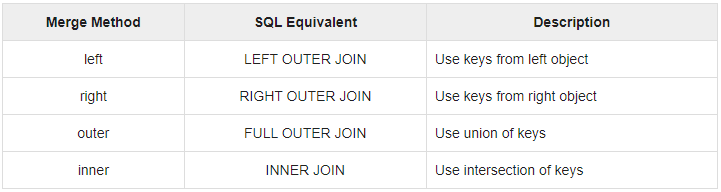 

[source](https://www.tutorialspoint.com/python_pandas/python_pandas_merging_joining.htm)

Let us see some examples of previous theory. 

In [44]:
# left join
print(pd.merge(left, right, on='subject_id', how='left'))

   id_x  Name_x subject_id  id_y Name_y
0     1    Alex       sub1   NaN    NaN
1     2     Amy       sub2   1.0  Billy
2     3   Allen       sub4   2.0  Brian
3     4   Alice       sub6   4.0  Bryce
4     5  Ayoung       sub5   5.0  Betty


In [45]:
# right join
print(pd.merge(left, right, on='subject_id', how='right'))

   id_x  Name_x subject_id  id_y Name_y
0   2.0     Amy       sub2     1  Billy
1   3.0   Allen       sub4     2  Brian
2   4.0   Alice       sub6     4  Bryce
3   5.0  Ayoung       sub5     5  Betty
4   NaN     NaN       sub3     3   Bran


In [46]:
# outer join 
print(pd.merge(left, right, how='outer', on='subject_id'))

   id_x  Name_x subject_id  id_y Name_y
0   1.0    Alex       sub1   NaN    NaN
1   2.0     Amy       sub2   1.0  Billy
2   3.0   Allen       sub4   2.0  Brian
3   4.0   Alice       sub6   4.0  Bryce
4   5.0  Ayoung       sub5   5.0  Betty
5   NaN     NaN       sub3   3.0   Bran


In [47]:
# inner join
print(pd.merge(left, right, on='subject_id', how='inner'))

   id_x  Name_x subject_id  id_y Name_y
0     2     Amy       sub2     1  Billy
1     3   Allen       sub4     2  Brian
2     4   Alice       sub6     4  Bryce
3     5  Ayoung       sub5     5  Betty


Joining was performed on index. Join operation honors the object on which it is called. So, a.join(b) is not equal to b.join(a). 

***
<a id=descriptive_stats></a>
# <font color=brown> Descriptive statistics</font>

Let us create a DataFrame and try some simple *pandas* methods for descriptive statistics.

In [3]:
#Create a Dictionary of series
d = {'Name':pd.Series(['Tom','James','Ricky','Vin','Steve','Smith','Jack',
   'Lee','David','Gasper','Betina','Andres']),
   'Age':pd.Series([25,26,25,23,30,29,23,34,40,30,51,46]),
   'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8,3.78,2.98,4.80,4.10,3.65])
}

#Create a DataFrame
df = pd.DataFrame(d)
print(df)

      Name  Age  Rating
0      Tom   25    4.23
1    James   26    3.24
2    Ricky   25    3.98
3      Vin   23    2.56
4    Steve   30    3.20
5    Smith   29    4.60
6     Jack   23    3.80
7      Lee   34    3.78
8    David   40    2.98
9   Gasper   30    4.80
10  Betina   51    4.10
11  Andres   46    3.65


`sum` returns the sum of the values for the requested axis. By default, axis is index (`axis=0`).

In [4]:
print(df.sum())

Name      TomJamesRickyVinSteveSmithJackLeeDavidGasperBe...
Age                                                     382
Rating                                                44.92
dtype: object


Each individual column is added individually (strings are appended).

In [5]:
print(df.sum(1))

0     29.23
1     29.24
2     28.98
3     25.56
4     33.20
5     33.60
6     26.80
7     37.78
8     42.98
9     34.80
10    55.10
11    49.65
dtype: float64


`mean` returns the average value. 

In [6]:
print(df.mean())

Age       31.833333
Rating     3.743333
dtype: float64


`std` returns the (Bressel) standard deviation of the numerical columns.

In [8]:
print(df.std())

Age       9.232682
Rating    0.661628
dtype: float64


Of course, there many other similar functions which can be applied to DataFrame. 

The `describe` function computes a summary of statistics pertaining to the DataFrame columns. 

In [9]:
print(df.describe())

             Age     Rating
count  12.000000  12.000000
mean   31.833333   3.743333
std     9.232682   0.661628
min    23.000000   2.560000
25%    25.000000   3.230000
50%    29.500000   3.790000
75%    35.500000   4.132500
max    51.000000   4.800000


In [11]:
print(df.describe(include=['object']))

         Name
count      12
unique     12
top     David
freq        1


In [12]:
print(df. describe(include='all'))

         Name        Age     Rating
count      12  12.000000  12.000000
unique     12        NaN        NaN
top     David        NaN        NaN
freq        1        NaN        NaN
mean      NaN  31.833333   3.743333
std       NaN   9.232682   0.661628
min       NaN  23.000000   2.560000
25%       NaN  25.000000   3.230000
50%       NaN  29.500000   3.790000
75%       NaN  35.500000   4.132500
max       NaN  51.000000   4.800000


***
<a id=visualization></a>
# <font color=brown> Visualization</font>

We use the standard convention for referencing the *matplotlib* API:

In [13]:
import matplotlib.pyplot as plt

We provide the basics in pandas to easily create decent looking plots. 

The `plot` method on Series and DataFrame is just a simple wrapper around `plt.plot`:

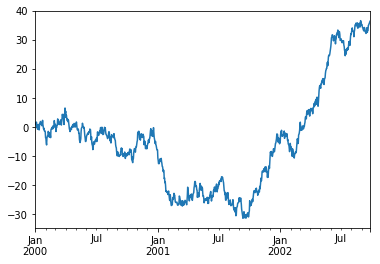

In [15]:
ts = pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

On DataFrame, `plot` is a convenience to plot all of the columns with labels. 

<Figure size 432x288 with 0 Axes>

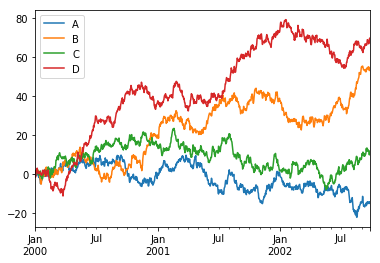

In [16]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
plt.figure();
df.plot();

You can plot one column versus another using the `x` and `y` keywords in `plot`:

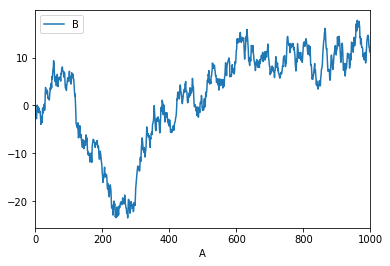

In [17]:
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()
df3['A'] = pd.Series(list(range(len(df))))
df3.plot(x='A', y='B')

Plotting methods allow for a handful of plot styles other than the default line plot. These methods can be provided as the `kind` keyword argument to `plot`, and include:

- 'bar' or 'barh' for [bar plots](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-barplot); 

- 'hist' for [histogram](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-hist); 

- ‘box’ for [boxplot](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-box); 

- 'kde' or 'density' for [density plots](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-kde); 

- 'area' for [area plots](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-area-plot); 

- 'scatter' for [scatter plots](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-scatter); 

- 'hexbin' for [hexagonal bin plots](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-hexbin); 

- 'pie' for pie [plots](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-pie). 

For example, a bar plot can be created the following way:

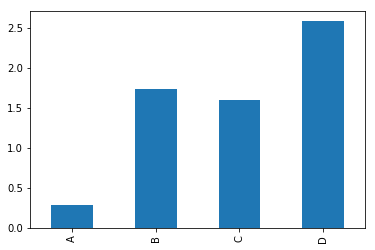

In [18]:
plt.figure();
df.iloc[5].plot(kind='bar');

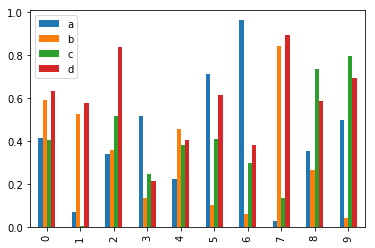

In [19]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2.plot.bar();

Finally, there are several plotting functions in `pandas.plotting` that take a Series or DataFrame as an argument. These include: 

- [Scatter Matrix](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-scatter-matrix)

- [Andrews Curves](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-andrews-curves)

- [Parallel Coordinates](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-parallel-coordinates)

- [Lag Plot](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-lag)

- [Autocorrelation Plot](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-autocorrelation)

- [Bootstrap Plot](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-bootstrap)

- [RadViz](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-radviz)

Plots may also be adorned with [errorbars](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-errorbars) or [tables](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-table).

***
<a id=files></a>
# <font color=brown> Working with external files</font>

### Reading data

It's quite simple to load data from various file formats into a DataFrame. 

**Reading data from CSVs.**

In [20]:
df = pd.read_csv('data/purchases.csv')
df

,Unnamed: 0,apples,oranges
0,June,3,0
1,Robert,2,3
2,Lily,0,7
3,David,1,2


CSVs don't have indexes like our DataFrames, so all we need to do is just designate the `index_col` when reading:

In [21]:
df = pd.read_csv('data/purchases.csv', index_col=0)
df

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


Here we're setting the index to be column zero. 

**Reading data from JSON.**

If you have a JSON file — which is essentially a stored Python `dict` — *pandas* can read this just as easily:

In [22]:
df = pd.read_json('data/purchases.json')
df

,apples,oranges
David,1,2
June,3,0
Lily,0,7
Robert,2,3


Notice this time our index came with us correctly since using JSON allowed indexes to work through nesting. Feel free to open `data_file.json` in a notepad so you can see how it works. 

Pandas will try to figure out how to create a DataFrame by analyzing structure of your JSON, and sometimes it doesn't get it right. Often you'll need to set the `orient` keyword argument depending on the structure, so check out `read_json` [docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html) about that argument to see which orientation you're using.

**Converting back to a CSV, JSON.**

Similar to the ways we read in data, pandas provides intuitive commands to save it. 

In [23]:
df.to_csv('data/new_purchases2.csv')

In [24]:
df.to_json('data/new_purchases2.json')

When we save JSON and CSV files, all we have to input into those functions is our desired filename with the appropriate file extension. In case of CSV files, we can also specify how data should be separated by input argument `sep` or we can set the encoding with `encoding`. The same is true for reading CSV files. 

Moreover, *pandas* can communicate and collaborate with databases (SQL for instance). See for example [this link](https://www.dataquest.io/blog/python-pandas-databases/) or [this one](https://medium.com/jbennetcodes/how-to-use-pandas-to-access-databases-e4e74e6a329e) to get familiar with it. 

***
<a id=references></a>
# <font color=brown> References</font>

* This tutorial was created with the help of official [Pandas tutorial](https://pandas.pydata.org/docs/getting_started/index.html) and also thanks to [Brendan Martin et al.](https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/), [tutorialspoint.com](https://www.tutorialspoint.com/python_pandas/index.htm). 